In [1]:
import pandas as pd
import numpy as np

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [3]:
exch = 'BTRX'
pair = 'BTC/USDT'

df = pd.read_csv(f"{exch}_{pair.replace('/', '-')}_ohlcv.csv")
df.head()

,timestamp,open,high,low,close,volume
0,2016-12-31 05:02:00,948.0,948.0,942.899,942.899,0.083403
1,2016-12-31 05:03:00,NaN,NaN,NaN,NaN,0.000000
2,2016-12-31 05:04:00,NaN,NaN,NaN,NaN,0.000000
3,2016-12-31 05:05:00,NaN,NaN,NaN,NaN,0.000000
4,2016-12-31 05:06:00,NaN,NaN,NaN,NaN,0.000000


In [4]:
df.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume       float64
dtype: object

In [5]:
# Clean up, passing forward close to OHLC for NaN
lastrow = df.iloc[0].copy()

def update_nan(row):
    global lastrow
    if row.volume == 0:
        close = lastrow.close
        
        row.open = close
        row.high = close
        row.low = close
        row.close = close
        
    lastrow = row.copy()
    return row
    
df = df.apply(update_nan, axis=1)
df.head()

,timestamp,open,high,low,close,volume
0,2016-12-31 05:02:00,948.000,948.000,942.899,942.899,0.083403
1,2016-12-31 05:03:00,942.899,942.899,942.899,942.899,0.000000
2,2016-12-31 05:04:00,942.899,942.899,942.899,942.899,0.000000
3,2016-12-31 05:05:00,942.899,942.899,942.899,942.899,0.000000
4,2016-12-31 05:06:00,942.899,942.899,942.899,942.899,0.000000


/home/rlarson/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/rlarson/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


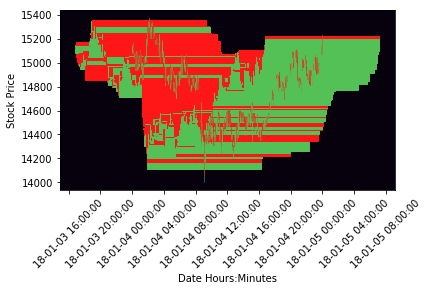

In [6]:
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

day = 60 * 24  # in minutes
cs_frame = df.iloc[-1 * day:].copy()

#if necessary convert to datetime
cs_frame.timestamp = pd.to_datetime(cs_frame.timestamp)

cs_frame = cs_frame[['timestamp', 'open', 'high', 'low', 'close', 'volume']]
cs_frame["timestamp"] = cs_frame["timestamp"].apply(mdates.date2num)

f1 = plt.subplot2grid((6, 4), (1, 0), rowspan=6, colspan=4, axisbg='#07000d')
candlestick_ohlc(f1, cs_frame.values, width=.6, colorup='#53c156', colordown='#ff1717')
f1.xaxis_date()
f1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S'))

plt.xticks(rotation=45)
plt.ylabel('Stock Price')
plt.xlabel('Date Hours:Minutes')
plt.show()

In [7]:
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
# import matplotlib.dates as mdates
# import datetime as dt

# #Reset the index to remove Date column from index
# df_ohlc = df.iloc[-200, 0:6].copy().reset_index()

# #Naming columns
# df_ohlc.columns = ["Date","Open","High",'Low',"Close"]

# #Converting dates column to float values
# df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

# #Making plot
# fig = plt.figure()
# fig.autofmt_xdate()

# ax1 = plt.subplot2grid((6,1), (0,0), rowspan=6, colspan=1)

# #Converts raw mdate numbers to dates
# ax1.xaxis_date()
# plt.xlabel("Date")
# print(df_ohlc)

# #Making candlestick plot
# candlestick_ohlc(ax1,df_ohlc.values,width=1, colorup='g', colordown='k',alpha=0.75)
# plt.ylabel("Price")
# plt.legend()

# plt.show()